In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#View the label encoding

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [26]:
# Create a DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [27]:
# Show the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
print(f"Features: {X.shape[1]} | Samples: {X.shape[0]}")

Features: 4 | Samples: 150


In [7]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [8]:
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [9]:
%pip install --upgrade matplotlib seaborn

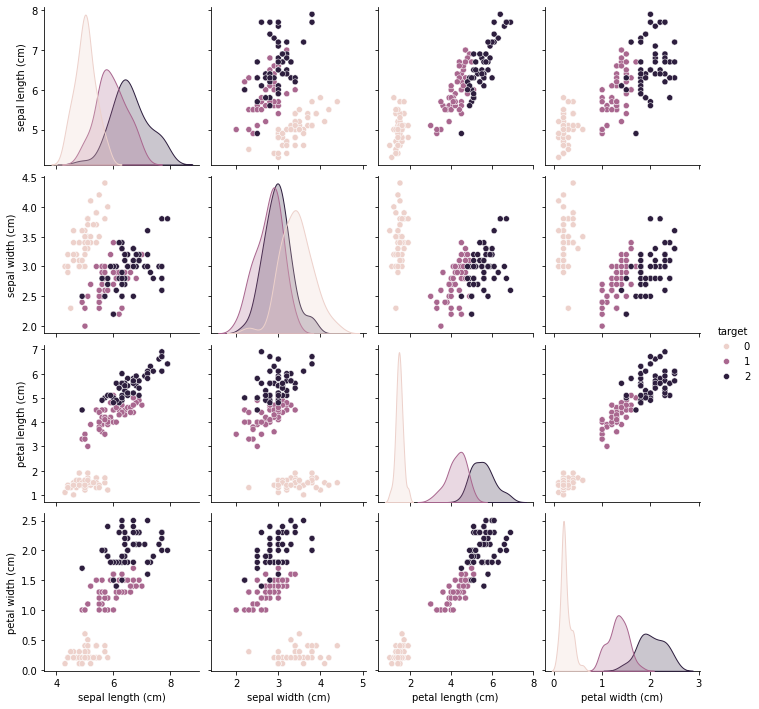

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target')
plt.show()

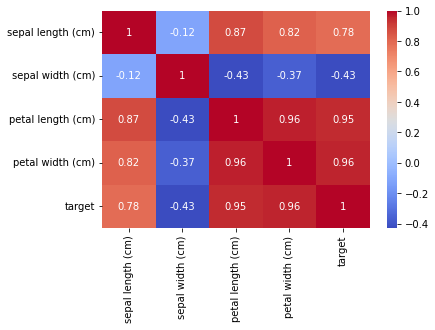

In [11]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

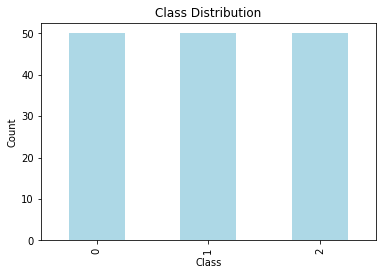

In [12]:
import matplotlib.pyplot as plt

# Visualizing the distribution of classes
df['target'].value_counts().plot(kind='bar', color='lightblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define the individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
gnb = GaussianNB()


In [17]:
# Create the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gnb', gnb)],
    voting='soft',  # Soft voting (using predicted probabilities)
    weights=[1, 2, 1]  # Weights for the classifiers (RandomForest gets more weight)
)

In [18]:
# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gnb', GaussianNB())],
                 voting='soft', weights=[1, 2, 1])

In [19]:
# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"VotingClassifier Accuracy: {accuracy:.2f}")


VotingClassifier Accuracy: 1.00


In [23]:
# Define the input function
import numpy as np
def make_prediction(sepal_length, sepal_width, petal_length, petal_width):
    # Convert the input to a numpy array (as the model expects a 2D array)
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Make the prediction using the trained model
    predicted_class = voting_clf.predict(input_data)[0]
    
    # Map the predicted class to the species name
    species_names = iris.target_names
    predicted_species = species_names[predicted_class]
    
    return predicted_species

In [24]:
# Example usage of the input function
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

In [ ]:
predicted_species = make_prediction(sepal_length, sepal_width, petal_length, petal_width)
print(f"Predicted species: {predicted_species}")

#Remember that the species has been encoded as follows: 0 = setosa, 1 = versicolor, 2 = virginica

Predicted species: setosa
